<a href="https://colab.research.google.com/github/arifsoul/development-phase/blob/main/development_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# UNZIP DATASET
!unzip /content/drive/MyDrive/Tes_Delameta/train.zip -d /content/sample_data/
!unzip /content/drive/MyDrive/Tes_Delameta/test.zip -d /content/sample_data/

Archive:  /content/drive/MyDrive/Tes_Delameta/train.zip
   creating: /content/sample_data/train/
   creating: /content/sample_data/train/cat/
 extracting: /content/sample_data/train/cat/0217.png  
 extracting: /content/sample_data/train/cat/0179.png  
 extracting: /content/sample_data/train/cat/0136.png  
 extracting: /content/sample_data/train/cat/0038.png  
 extracting: /content/sample_data/train/cat/0241.png  
 extracting: /content/sample_data/train/cat/0016.png  
 extracting: /content/sample_data/train/cat/0018.png  
 extracting: /content/sample_data/train/cat/0199.png  
 extracting: /content/sample_data/train/cat/0002.png  
 extracting: /content/sample_data/train/cat/0233.png  
 extracting: /content/sample_data/train/cat/0228.png  
 extracting: /content/sample_data/train/cat/0023.png  
 extracting: /content/sample_data/train/cat/0027.png  
 extracting: /content/sample_data/train/cat/0170.png  
 extracting: /content/sample_data/train/cat/0143.png  
 extracting: /content/sample_data

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch.optim as optim

# set device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# set hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 32

# define data transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# create data loaders
train_dataset = ImageFolder('/content/sample_data/train', transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = ImageFolder('/content/sample_data/test', transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# define model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.relu1 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 56 * 56, 256)
        self.relu3 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 56 * 56)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

model = MyModel().to(device)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# train model

for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    model.train()

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total
    train_loss /= len(train_loader)

    print('Epoch: {}, Train Loss:{:.3f}, Train Accuracy: {:.3f}%'.format(epoch+1, train_loss, train_accuracy))

Epoch: 1, Train Loss:2.904, Train Accuracy: 21.607%
Epoch: 2, Train Loss:1.805, Train Accuracy: 34.643%
Epoch: 3, Train Loss:1.599, Train Accuracy: 43.321%
Epoch: 4, Train Loss:1.464, Train Accuracy: 48.821%
Epoch: 5, Train Loss:1.306, Train Accuracy: 53.464%
Epoch: 6, Train Loss:1.148, Train Accuracy: 61.607%
Epoch: 7, Train Loss:0.900, Train Accuracy: 69.393%
Epoch: 8, Train Loss:0.675, Train Accuracy: 77.464%
Epoch: 9, Train Loss:0.488, Train Accuracy: 83.714%
Epoch: 10, Train Loss:0.353, Train Accuracy: 89.214%
Epoch: 11, Train Loss:0.239, Train Accuracy: 93.357%
Epoch: 12, Train Loss:0.142, Train Accuracy: 96.071%
Epoch: 13, Train Loss:0.142, Train Accuracy: 95.964%
Epoch: 14, Train Loss:0.071, Train Accuracy: 98.071%
Epoch: 15, Train Loss:0.051, Train Accuracy: 98.429%
Epoch: 16, Train Loss:0.041, Train Accuracy: 98.857%
Epoch: 17, Train Loss:0.038, Train Accuracy: 99.000%
Epoch: 18, Train Loss:0.053, Train Accuracy: 98.714%
Epoch: 19, Train Loss:0.056, Train Accuracy: 98.286%
Ep

In [6]:
test_loss = 0.0
test_correct = 0
test_total = 0

model.eval()

with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    test_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    test_total += labels.size(0)
    test_correct += (predicted == labels).sum().item()
    test_accuracy = 100 * test_correct / test_total
    test_loss /= len(test_loader)
    test_accuracy = 100 * test_correct / test_total
    test_loss /= len(test_loader)

    print('Test Loss: {:.3f}, Test Accuracy: {:.3f}%'.format(test_loss, test_accuracy))

Test Loss: 0.048, Test Accuracy: 59.375%
Test Loss: 0.062, Test Accuracy: 51.562%
Test Loss: 0.087, Test Accuracy: 43.750%
Test Loss: 0.134, Test Accuracy: 38.281%
Test Loss: 0.067, Test Accuracy: 42.500%
Test Loss: 0.064, Test Accuracy: 43.750%
Test Loss: 0.043, Test Accuracy: 44.000%


In [8]:
# define file path for model
model_path = '/content/drive/MyDrive/Tes_Delameta/model.pth'

# save model state dictionary
torch.save(model.state_dict(), model_path)


In [12]:
# example input
example_input = torch.randn(1, 3, 224, 224)

# export model to TorchScript
traced_script_module = torch.jit.trace(model, example_input)

# save model as file
script_module_path = '/content/drive/MyDrive/Tes_Delameta/model.pt'
traced_script_module.save(script_module_path)

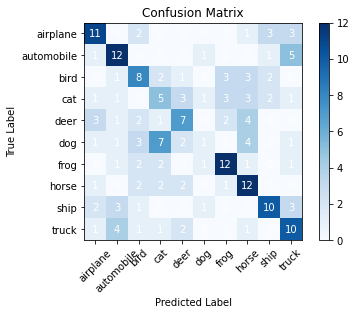

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

# set device to CPU
device = 'cpu'

file_path = '/content/drive/MyDrive/Tes_Delameta/model.pth'
# load model
# model = torch.load(, map_location=device)

model = MyModel()
model.load_state_dict(torch.load(file_path))

# load test dataset
test_data = ImageFolder('/content/sample_data/test', transform=test_transforms)

# create dataloader
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

# make predictions on test dataset
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_data.classes))
plt.xticks(tick_marks, test_data.classes, rotation=45)
plt.yticks(tick_marks, test_data.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# display values inside the plot
for i in range(len(test_data.classes)):
    for j in range(len(test_data.classes)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()


In [ ]:
#include <torch/script.h>
#include <iostream>
#include <memory>

int main() {
    // load model from file
    std::string model_path = "model.pt";
    std::shared_ptr<torch::jit::script::Module> module = torch::jit::load(model_path);

    // create example input
    at::Tensor input = torch::ones({1, 3, 224, 224});

    // run inference
    at::Tensor output = module->forward({input}).toTensor();

    // print output
    std::cout << "Output: " << output << std::endl;

    return 0;
}
